In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [52]:
iris = load_iris()

In [54]:
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['variety'] = iris.target
data = data[['sepal length (cm)', 'sepal width (cm)', 'variety']]

In [55]:
data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [56]:
#Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [57]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
#Постройте модель LDA
lda = LinearDiscriminantAnalysis()

In [60]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, lda.predict(data_test))

0.7666666666666667

Эффективность модели не высокая - только 76% предсказаний оказались правильными 

In [65]:
lda.means_

array([[4.97906977, 3.41162791],
       [5.87368421, 2.78157895],
       [6.48974359, 2.93333333]])

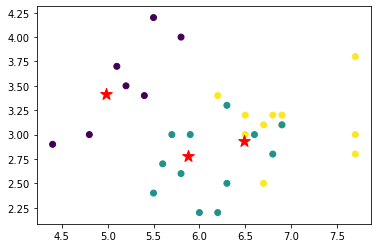

In [66]:
#Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(data_test['sepal length (cm)'], data_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [67]:
#Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
data_new = data[['sepal length (cm)', 'sepal width (cm)']]

In [70]:
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [75]:
X_scaled = scaler.fit_transform(data_new)

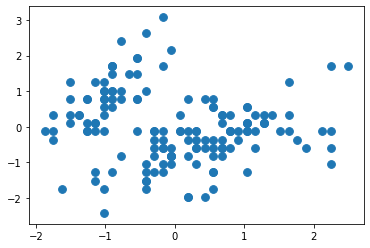

In [81]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [76]:
from sklearn.cluster import KMeans

In [77]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

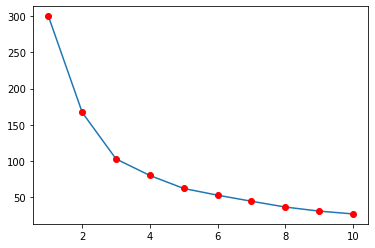

In [78]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

По методу локтя определяем, что необходимо 3 кластера 

In [82]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

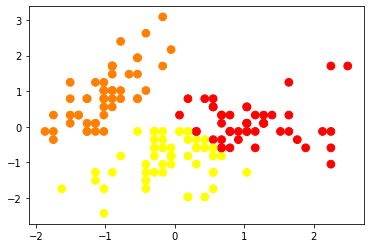

In [83]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)